In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')

In [3]:
X_test = images[4992:6012]
y_test = masks[4992:6012]

In [4]:
images = images[0:4992]
masks = masks[0:4992]

In [5]:
images.shape

(4992, 512, 512, 1)

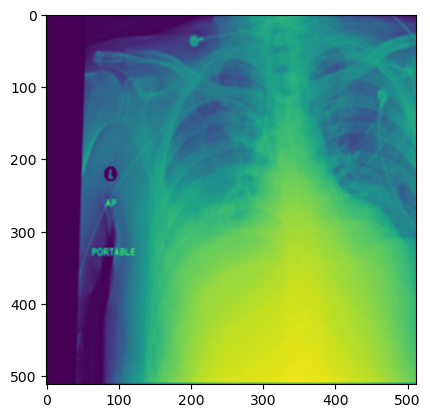

In [6]:
imshow(images[100])

In [7]:
masks.shape

(4992, 512, 512, 1)

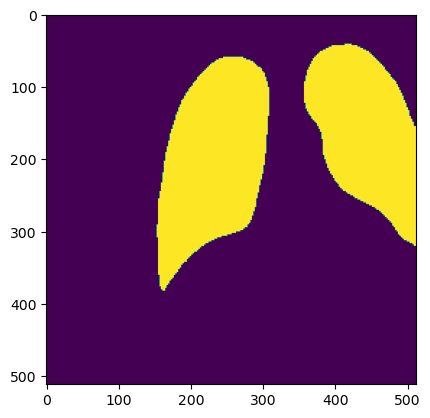

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpvge8e87ikuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpxorc0ovjkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpxorc0ovjkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=5, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_2_5_LungOpacity.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
16/16 [==============================] - 27s 1s/step - loss: 0.0297 - dice_coeff: 0.9599 - val_loss: 0.0257 - val_dice_coeff: 0.9674
Epoch 2/100
16/16 [==============================] - 8s 496ms/step - loss: 0.0230 - dice_coeff: 0.9675 - val_loss: 0.0240 - val_dice_coeff: 0.9689
Epoch 3/100
16/16 [==============================] - 8s 516ms/step - loss: 0.0203 - dice_coeff: 0.9713 - val_loss: 0.0219 - val_dice_coeff: 0.9713
Epoch 4/100
16/16 [==============================] - 8s 498ms/step - loss: 0.0198 - dice_coeff: 0.9721 - val_loss: 0.0226 - val_dice_coeff: 0.9713
Epoch 5/100
16/16 [==============================] - 8s 494ms/step - loss: 0.0172 - dice_coeff: 0.9756 - val_loss: 0.0227 - val_dice_coeff: 0.9727
Epoch 6/100
16/16 [==============================] - 8s 492ms/step - loss: 0.0155 - dice_coeff: 0.9781 - val_loss: 0.0234 - val_dice_coeff: 0.9732
Epoch 7/100
16/16 [==============================] - 8s 494ms/step - loss: 0

10/10 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 143 machine labels.
Replacing 47 from 143 !
D_relabeled_ 47
point ids 47
Removed: 47 Filled: 47
TOOK 302.6285424232483 seconds
==== DONE LOOP 2 ====
******
Loop 3
Epoch 1/100
22/22 [==============================] - 15s 696ms/step - loss: 0.0243 - dice_coeff: 0.9711 - val_loss: 0.0357 - val_dice_coeff: 0.9572
Epoch 2/100
22/22 [==============================] - 9s 432ms/step - loss: 0.0212 - dice_coeff: 0.9715 - val_loss: 0.0313 - val_dice_coeff: 0.9680
Epoch 3/100
22/22 [==============================] - 10s 446ms/step - loss: 0.0190 - dice_coeff: 0.9745 - val_loss: 0.0285 - val_dice_coeff: 0.9677
Epoch 4/100
22/22 [==============================] - 9s 437ms/step - loss: 0.0143 - dice_coeff: 0.9803 - val_loss: 0.0295 - val_dice_coeff: 0.9725
Epoch 5/100
22/22 [==============================] - 9s 436ms/step - loss: 0.0111 - dice_coeff: 0.9846 - val_loss: 0.0305 - val_dice_coeff: 0.9736
Ep

28/28 [==============================] - 11s 396ms/step - loss: 0.0051 - dice_coeff: 0.9931 - val_loss: 0.0433 - val_dice_coeff: 0.9763
Epoch 5/100
28/28 [==============================] - 11s 393ms/step - loss: 0.0046 - dice_coeff: 0.9938 - val_loss: 0.0481 - val_dice_coeff: 0.9762
Epoch 6/100
28/28 [==============================] - 11s 393ms/step - loss: 0.0045 - dice_coeff: 0.9939 - val_loss: 0.0499 - val_dice_coeff: 0.9765
Epoch 7/100
28/28 [==============================] - 11s 391ms/step - loss: 0.0039 - dice_coeff: 0.9947 - val_loss: 0.0540 - val_dice_coeff: 0.9768
Epoch 8/100
28/28 [==============================] - 11s 397ms/step - loss: 0.0032 - dice_coeff: 0.9955 - val_loss: 0.0625 - val_dice_coeff: 0.9770
Epoch 9/100
28/28 [==============================] - 11s 400ms/step - loss: 0.0030 - dice_coeff: 0.9959 - val_loss: 0.0643 - val_dice_coeff: 0.9771
Epoch 10/100
28/28 [==============================] - 11s 396ms/step - loss: 0.0028 - dice_coeff: 0.9962 - val_loss: 0.0655 

In [16]:
R.classifier_scores

[[0.03965821489691734, 0.9751436114311218],
 [0.06300730258226395, 0.9765799641609192],
 [0.06500983983278275, 0.9754543900489807],
 [0.07019316405057907, 0.9756815433502197],
 [0.05914933979511261, 0.9753033518791199]]

In [17]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

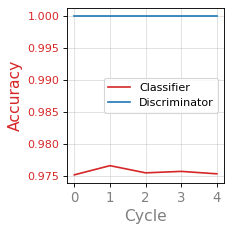

In [18]:
R.plot()

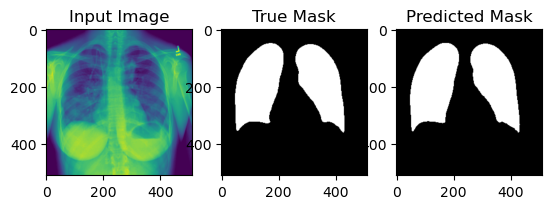

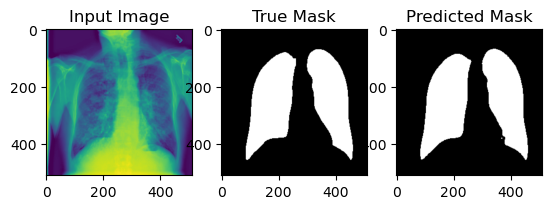

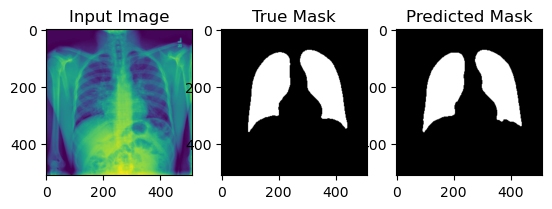

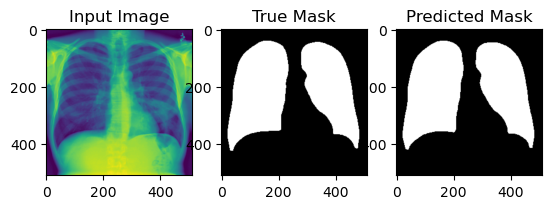

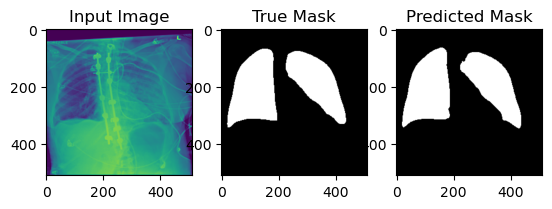

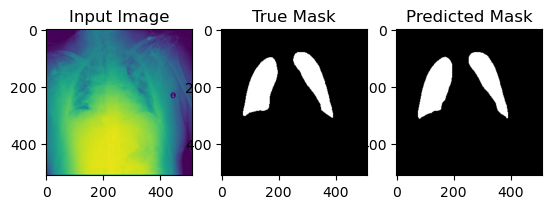

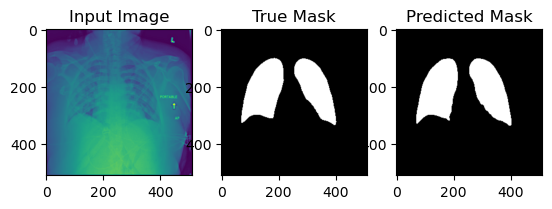

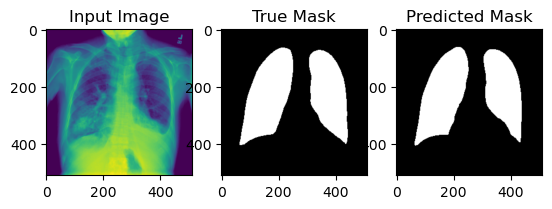

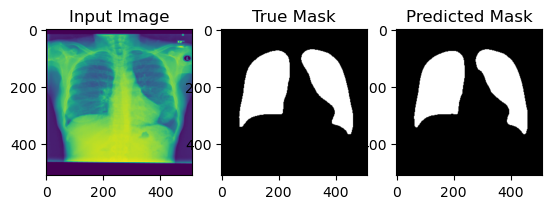

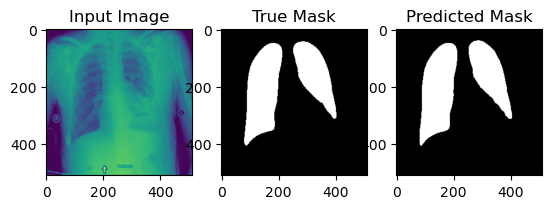

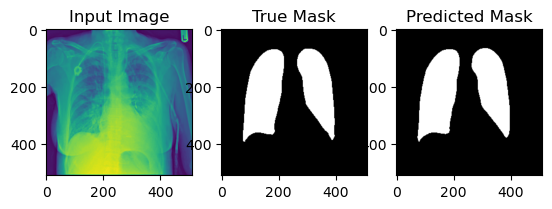

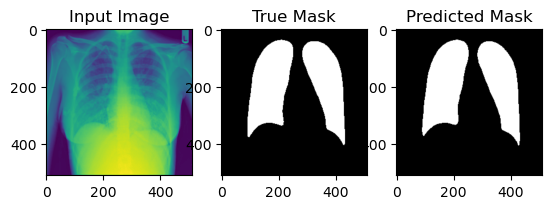

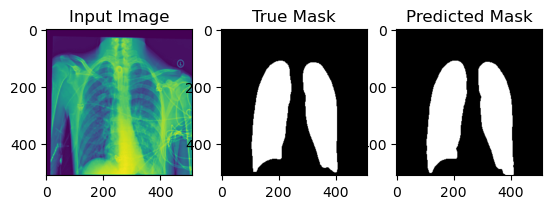

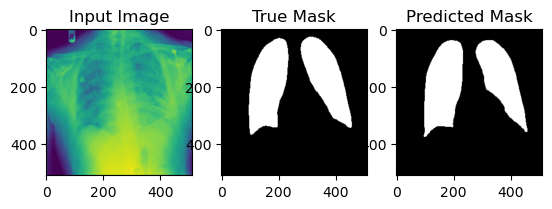

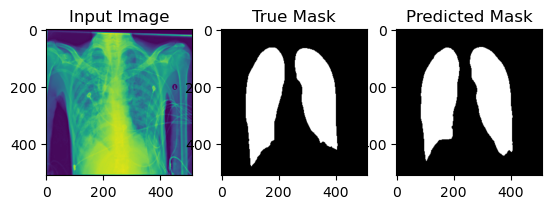

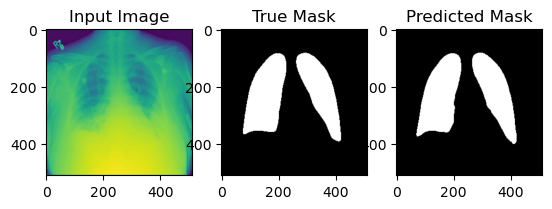

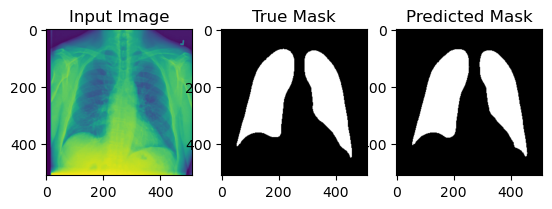

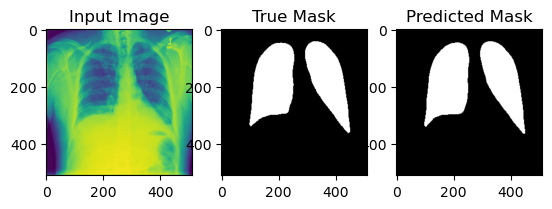

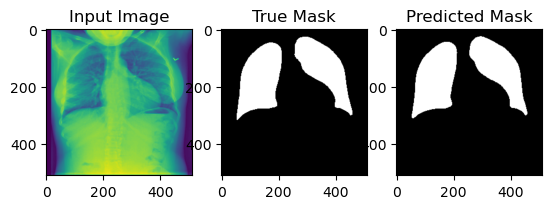

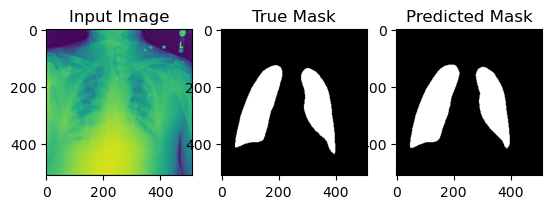

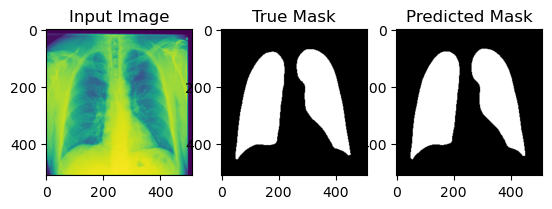

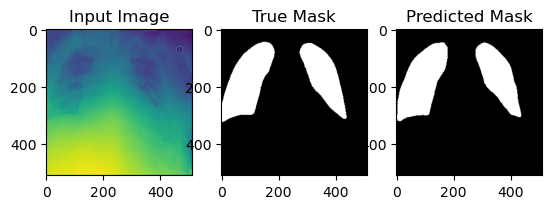

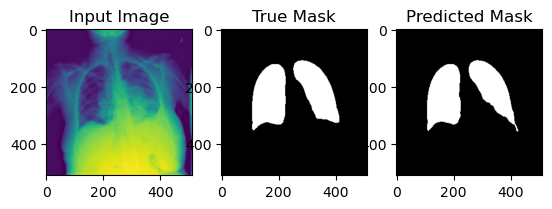

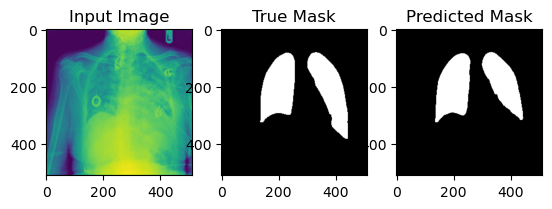

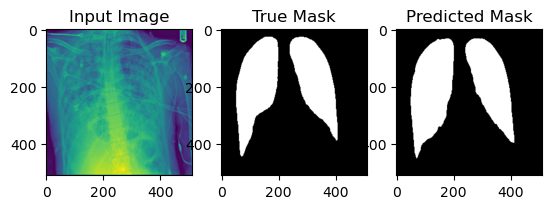

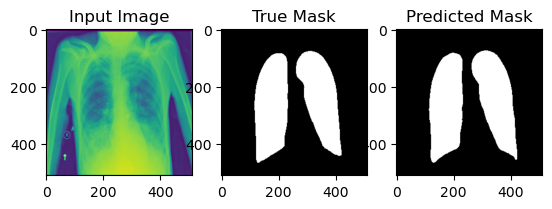

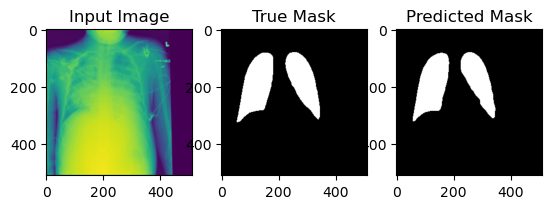

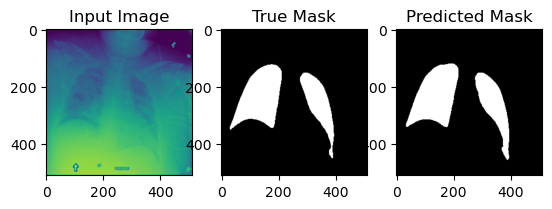

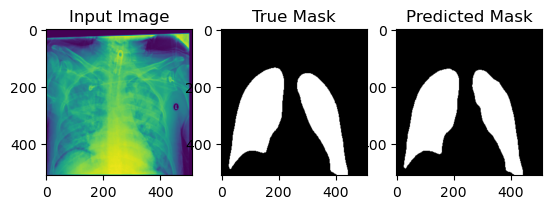

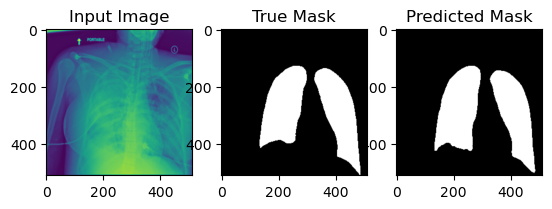

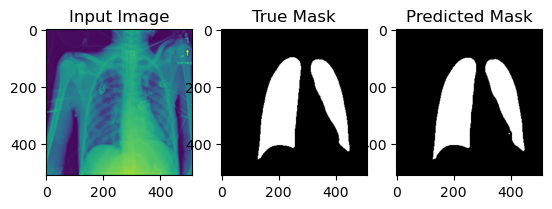

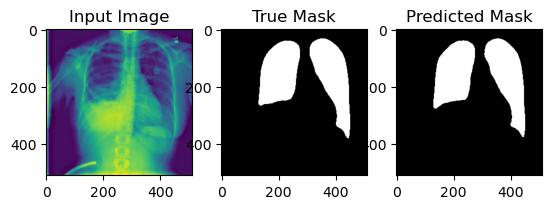

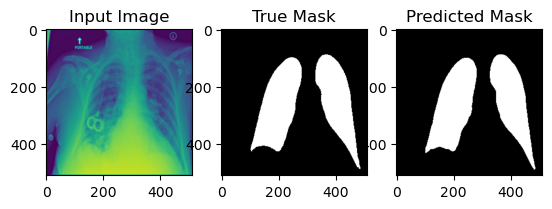

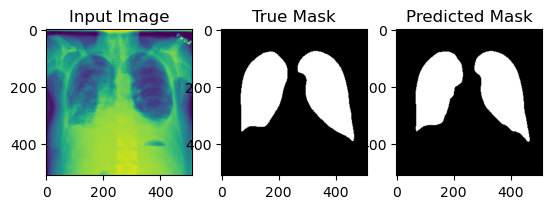

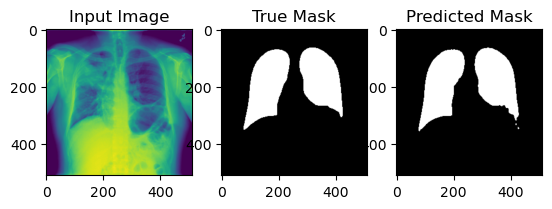

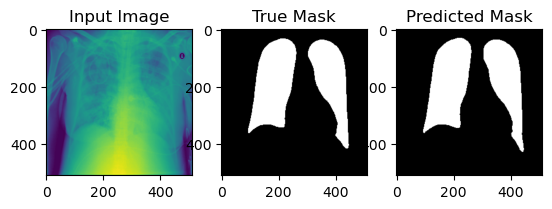

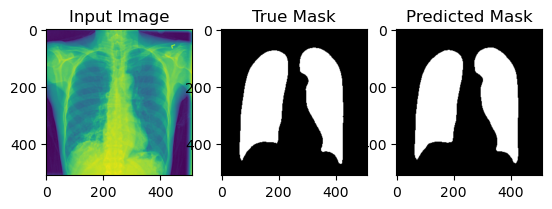

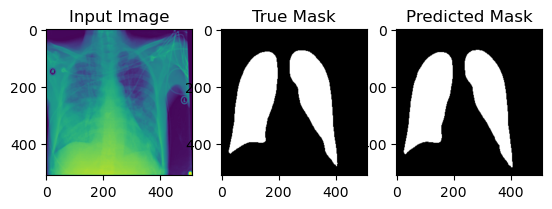

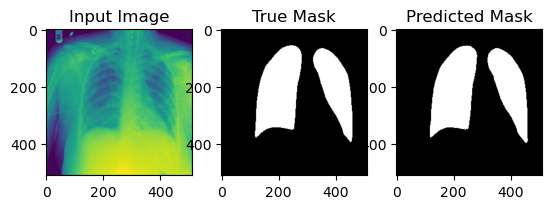

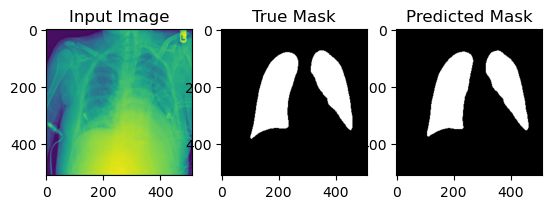

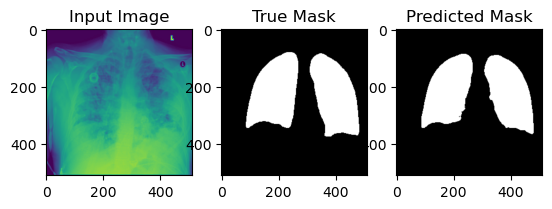

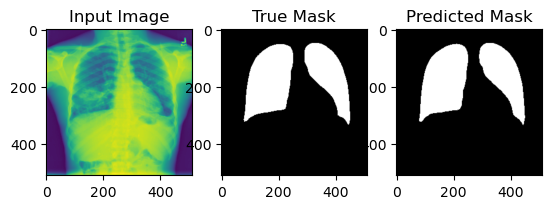

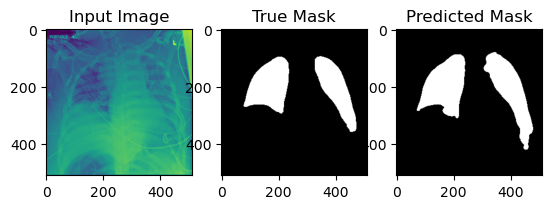

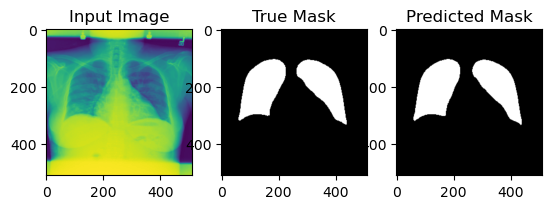

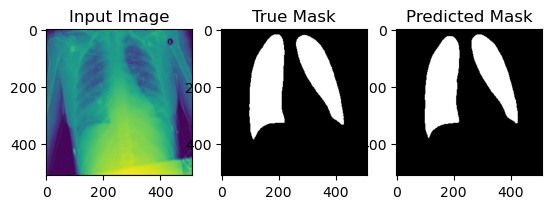

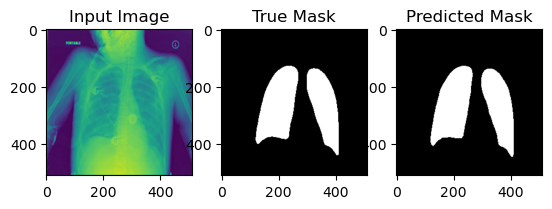

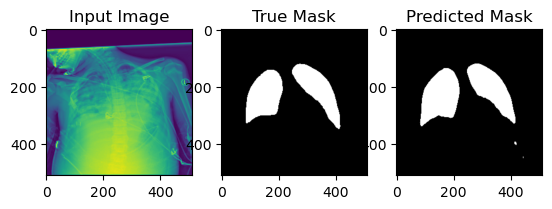

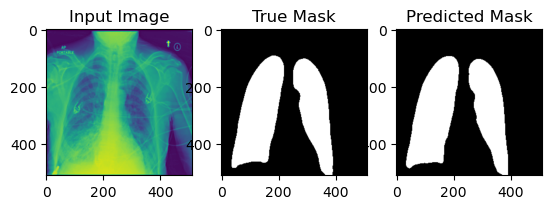

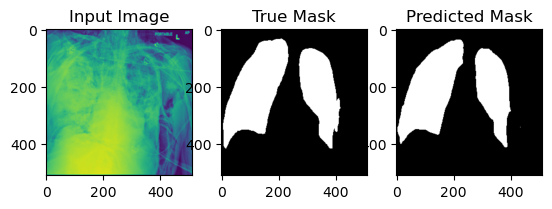

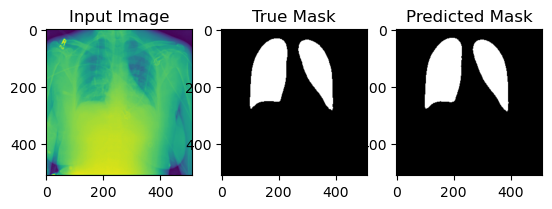

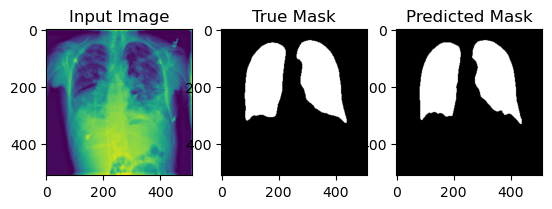

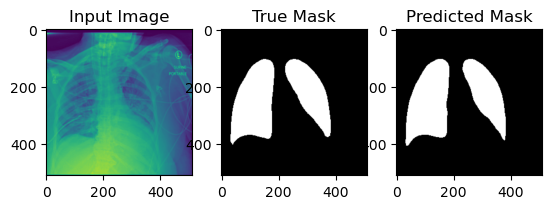

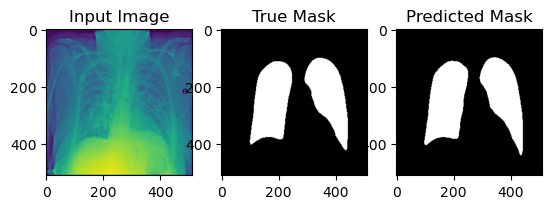

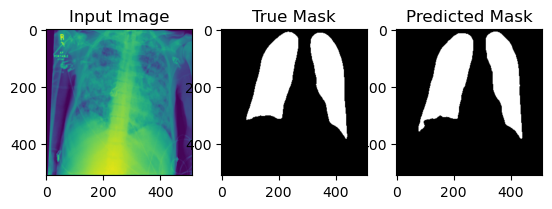

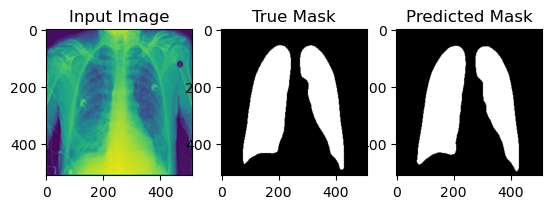

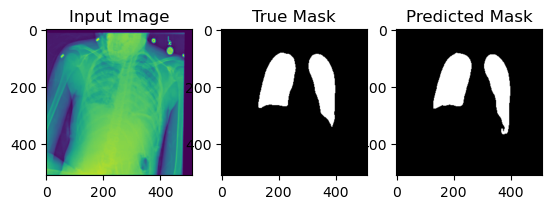

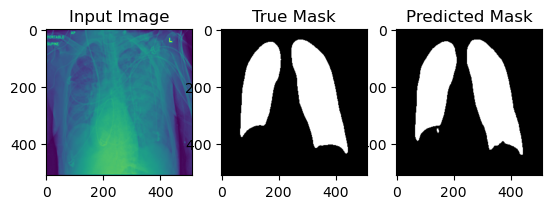

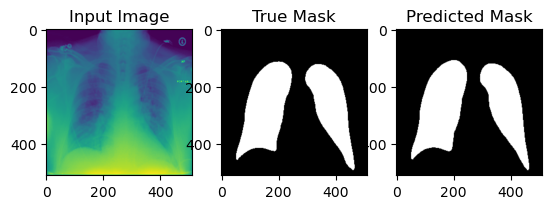

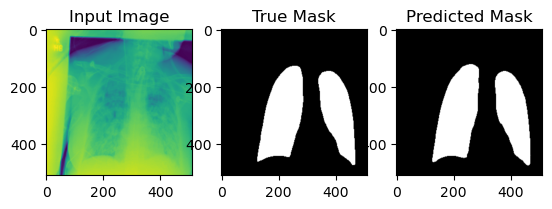

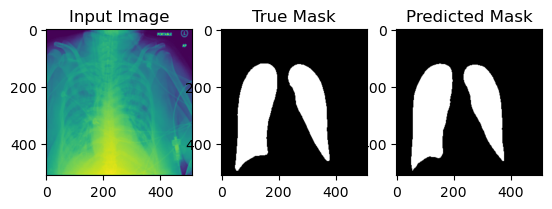

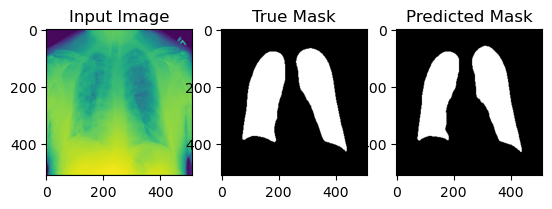

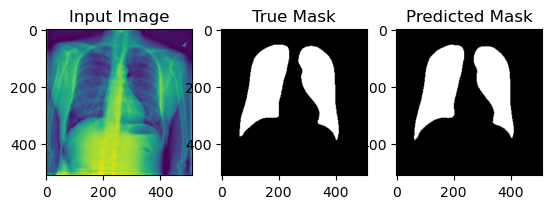

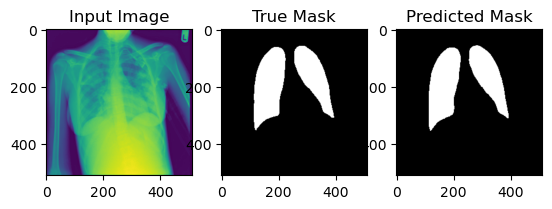

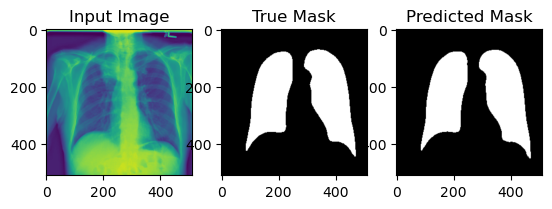

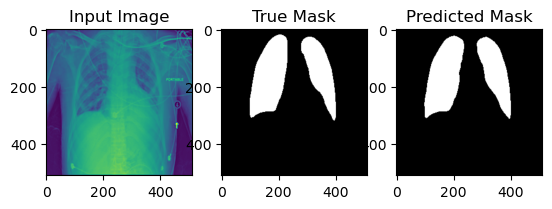

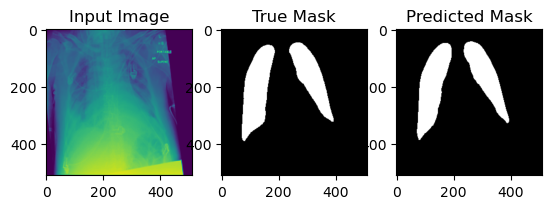

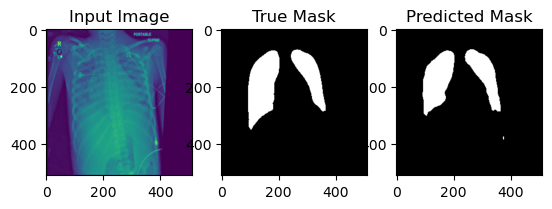

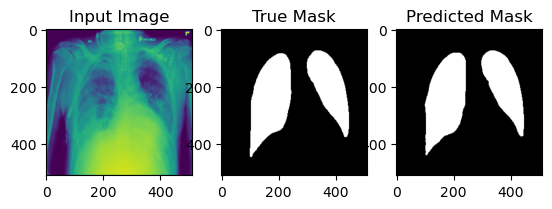

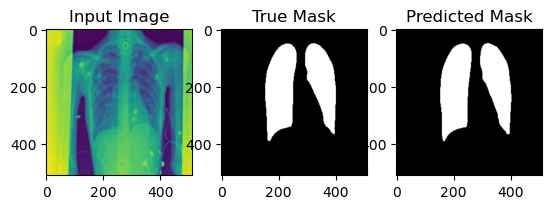

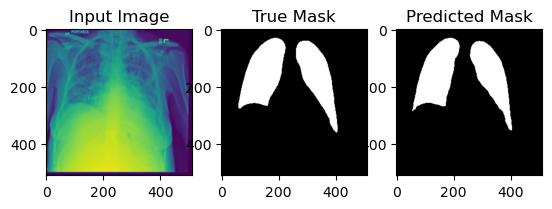

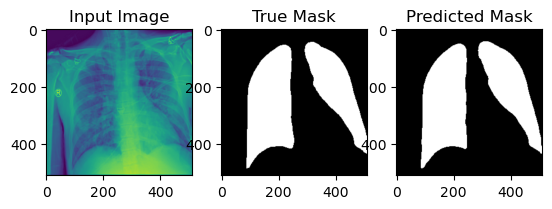

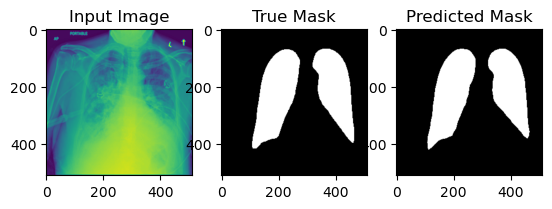

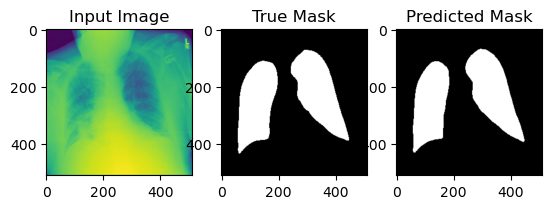

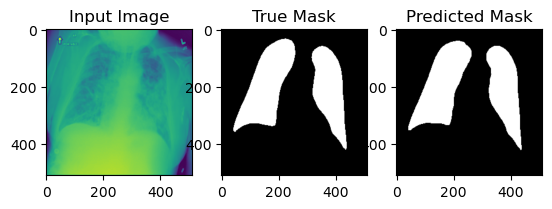

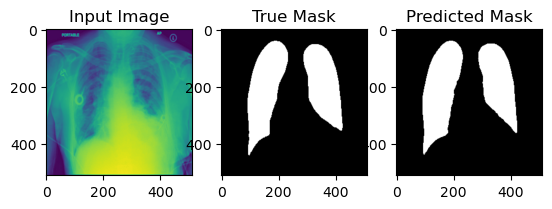

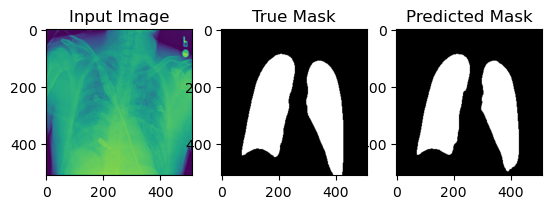

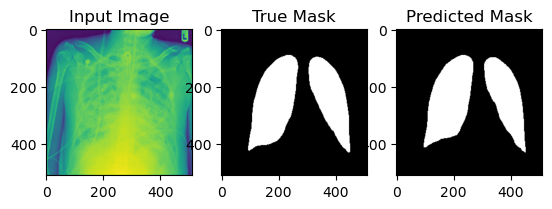

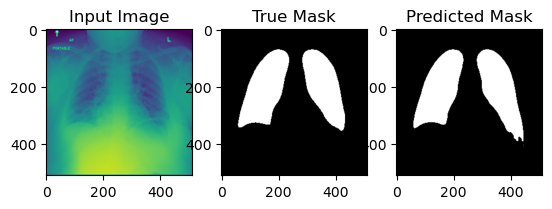

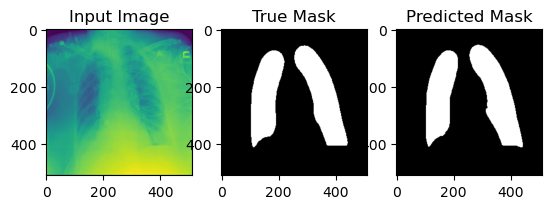

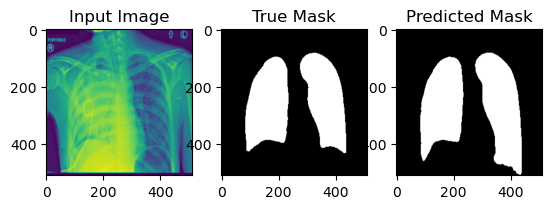

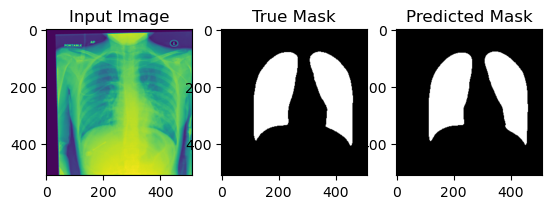

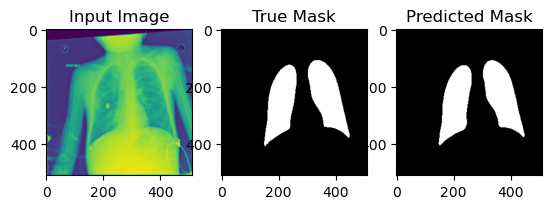

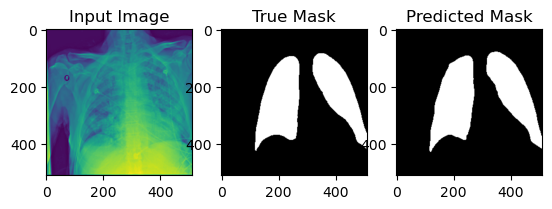

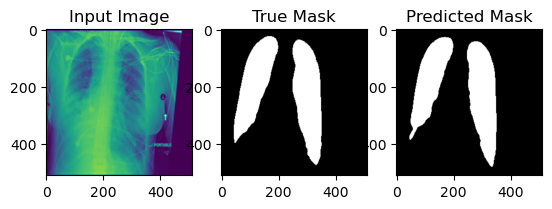

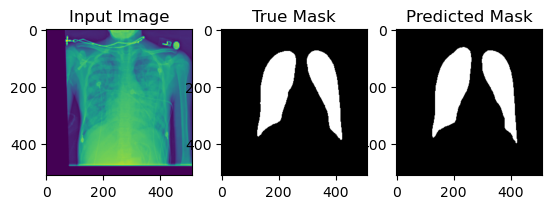

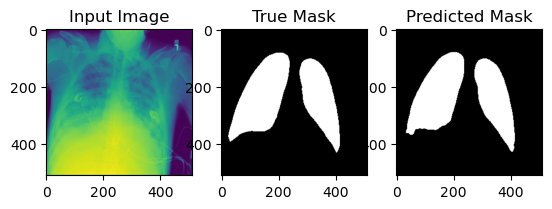

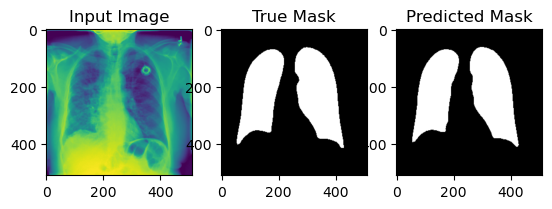

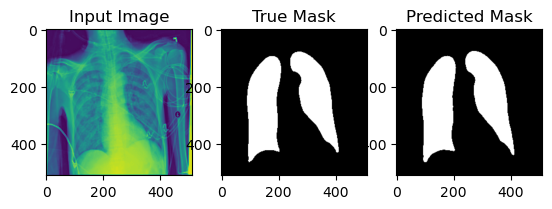

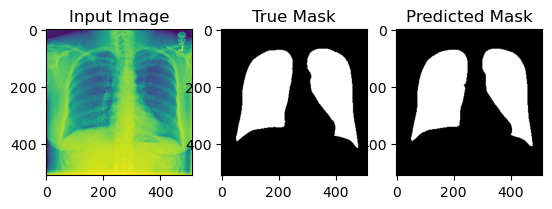

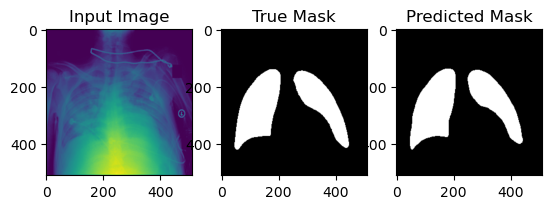

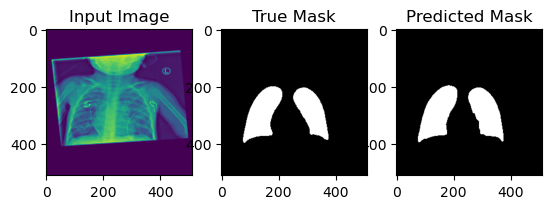

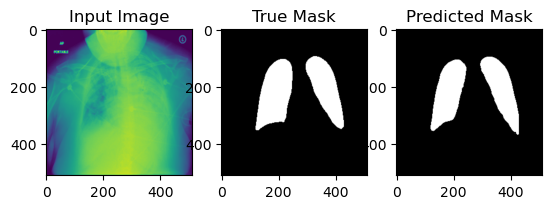

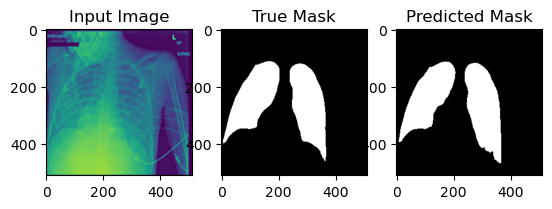

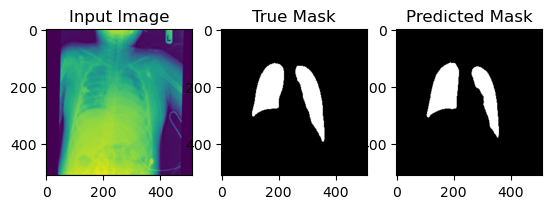

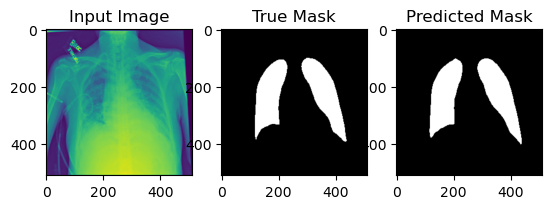

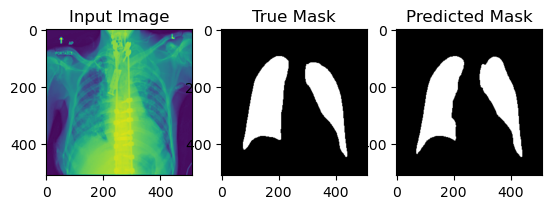

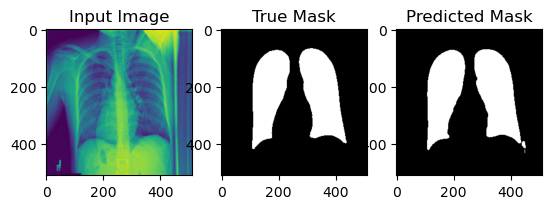

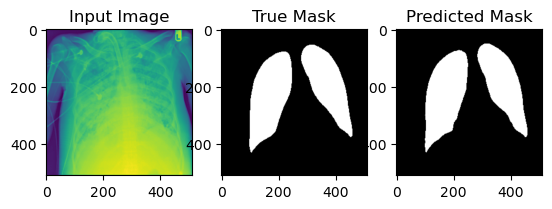

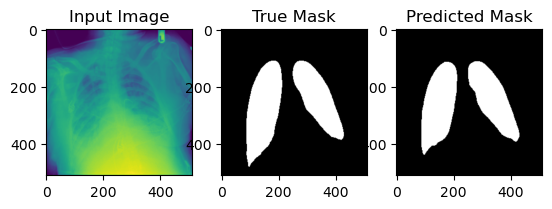

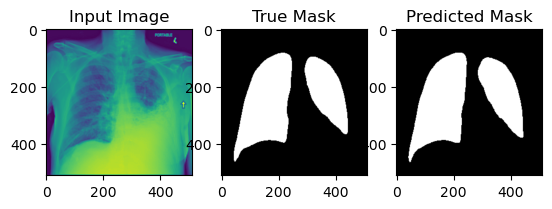

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpvge8e87ikuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpxorc0ovjkuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
BareBone.model.metrics_names

['loss', 'dice_coeff']